In [60]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(1, 'D:/kaneshi')
import kaneshi

from kaneshi.ml.dataset import Dataset
from kaneshi.ml.model import Model
from kaneshi.ml.nn_models import CNN1D

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers, layers
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [62]:
ds_fn = '14_45_55_0.01_ohlc'

In [63]:
ds = Dataset.from_fn(ds_fn=ds_fn)

In [64]:
ds = ds.split().make_equal().normalize_each()

In [65]:
ds.show_info()

train (2980, 100, 4)
val (422, 100, 4)
test (298, 100, 4)


In [71]:
lookback = 100
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy(name='binary_crossentropy')
metrics = ['accuracy']


cnn = CNN1D(input_shape=((lookback, ds.dataset['x_train'].shape[-1])),
                optimizer=optimizer,
                loss=loss,
                metrics=metrics)
cnn.build(n_layers=5, n_filters=4, kernel_size=5, num_last_neurons=1, activation='sigmoid')
model = cnn.compile()

In [72]:
model = Model(dataset=ds.dataset,
              model=model,
              
              callbacks=[],
              optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [79]:
model.fit(epoch=500, batch_size=500)

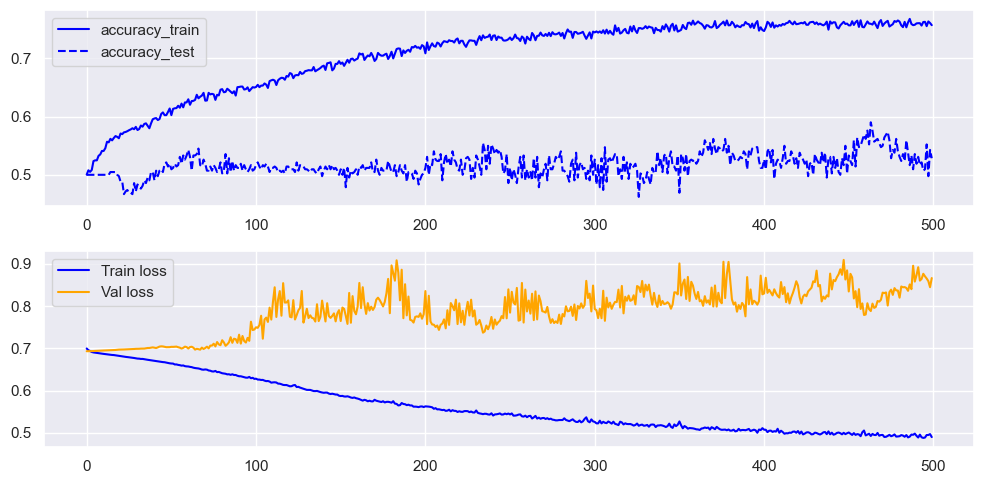

In [74]:
model.plot_history()

In [75]:
model.evaluate()

{'train': [0.5108655095100403, 0.7463087439537048],
 'val': [0.8663774728775024, 0.528436005115509],
 'test': [0.9014280438423157, 0.5033556818962097]}

10/10 [==============================] - 0s 2ms/step
Accuracy 0.5
Recall  0.0
Precision  0.0
F1  0.0


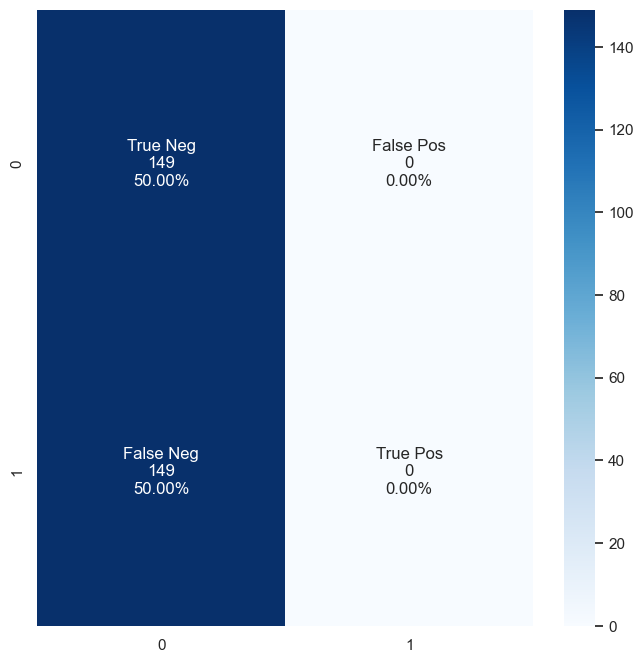

In [76]:
model.show_confusion()

10/10 [==============================] - 0s 2ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.514


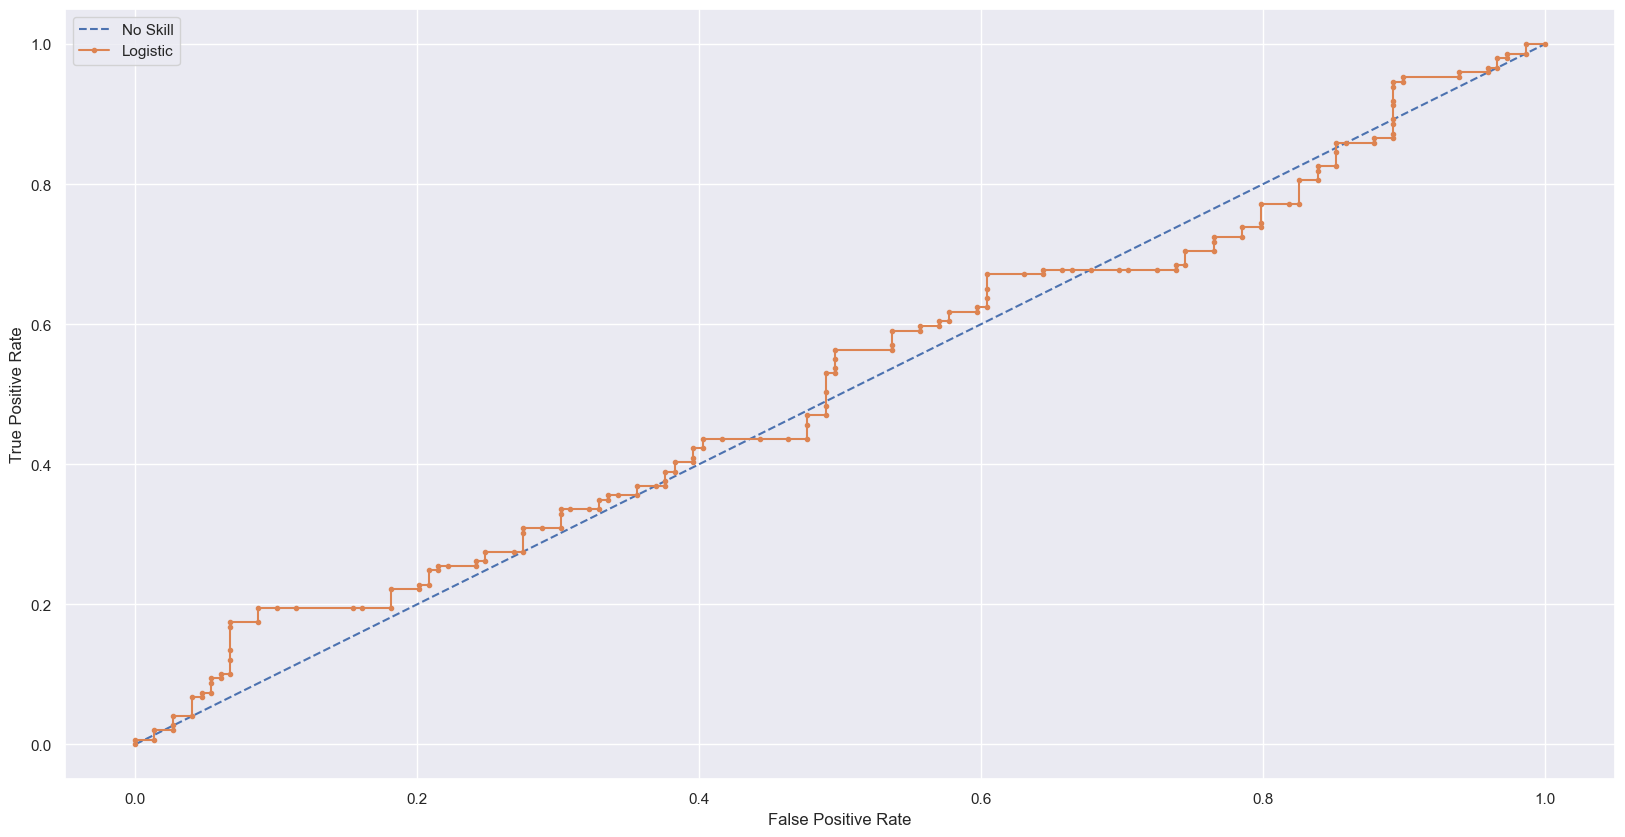

In [77]:
model.plot_roc_auc()